In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
#loading the dataset

df = pd.read_csv("C:/Users/asus/Documents/Python classes and assignments/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [6]:
df.shape

(205, 26)

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
# observing some numeric values( so need to exctact them)
print(df.select_dtypes(include='object').columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [9]:
# Extract car brand
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

df.drop(['CarName'], axis=1, inplace=True)

In [10]:
print("Object columns:\n", df.select_dtypes(include='object').columns.tolist())

Object columns:
 ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [11]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
# checking for all object columns got deleted
print(df.dtypes)

car_ID                   int64
symboling                int64
wheelbase              float64
carlength              float64
carwidth               float64
                        ...   
CarBrand_toyouta          bool
CarBrand_vokswagen        bool
CarBrand_volkswagen       bool
CarBrand_volvo            bool
CarBrand_vw               bool
Length: 71, dtype: object


In [14]:
print("Remaining object columns:", df.select_dtypes(include='object').columns.tolist())

Remaining object columns: []


In [15]:
# importing libraaies for model implementation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
# train_test_split
X = df.drop("price", axis = 1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.2, random_state = 42)

In [19]:
# Initializing Models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state = 42),
    "Random Forest": RandomForestRegressor(random_state = 42),
    "Gradient Bostng": GradientBoostingRegressor(random_state = 42),
    "SVR": SVR()
}

In [22]:
# Fit and predict
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
       "R2": r2_score(y_test, y_pred),
       "MSE": mean_squared_error(y_test, y_pred),
       "MAE": mean_absolute_error(y_test, y_pred)
    }

In [23]:
# model evaluation
results_df = pd.DataFrame(results).T
results_df.sort_values("R2", ascending = False)


,R2,MSE,MAE
Random Forest,0.956085,3.466814e+06,1323.495195
Gradient Bostng,0.927344,5.735783e+06,1716.920734
DecisionTree,0.888340,8.814860e+06,1938.906512
LinearRegression,0.762073,1.878290e+07,2361.331991
SVR,-0.101981,8.699480e+07,5707.137024


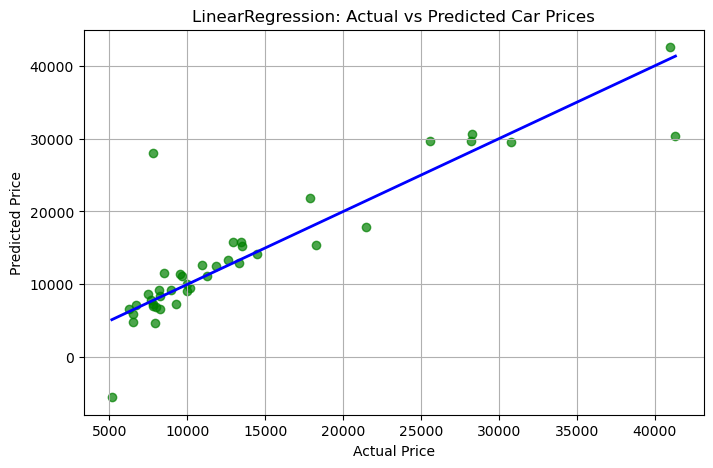

In [28]:
# going for a visualization chart
Best_model = models[results_df.index[0]]
y_pred_best = Best_model.predict(X_test)

plt.figure(figsize = (8,5))
plt.scatter(y_test, y_pred_best, alpha = 0.7, color ='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f"{results_df.index[0]}: Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='blue', lw=2)
plt.grid()
plt.show()

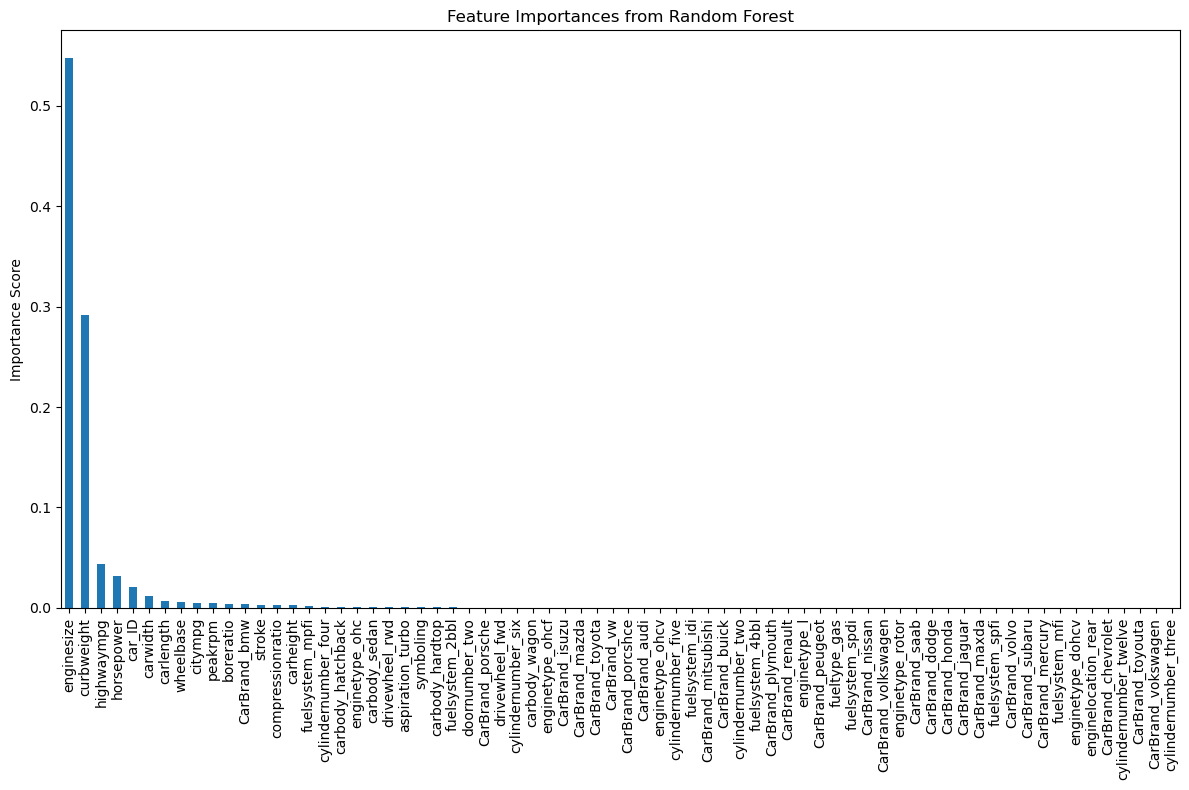

In [30]:
# feaure analysis 
#finding the best performing model( checking the model with highest r2 rate and lowest MSE anf
best_model = RandomForestRegressor(random_state = 42)
best_model.fit(X_train, y_train)

importance = best_model.feature_importances_
features =  pd.Series(importances, index = X.columns)

plt.figure(figsize =(12,8))
features.sort_values(ascending = False).plot(kind= 'bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Based on randomforest feature, the most influential features affecting car prices are 
- Engine Size, Curbweight, HorsePowe, Carwidth, Highwaympg, Citympg, Cylindernumber_four,carheight, carlenght etc

In [ ]:
# Hyper Parameter tuning(  for checking wether the performance of model has increased or not)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid= param_grid, 
    cv=3, scoring='r2',
    n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
y_pred_tuned = grid_search.predict(X_test)
print("Best R2 score on training set:", round(grid_search.best_score_,4))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Best R2 score on training set: 0.8813


In [35]:
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Test R2 after hyper parameter tuning:", r2_tuned)

Test R2 after hyper parameter tuning: 0.9444865852913358


## result of hyper parameter tuning
The best parameters found are
n_estimators: 150
max_depth: None
min_samples_split: 10
R2 score improved to 0.9445 after tuning( performance of the model has increased)